**Week 1-2: Project Planning & Data Preparation**

In [ ]:
!pip install datasets

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# --- Load IMDb dataset ---
dataset = load_dataset("imdb")
df = pd.concat([pd.DataFrame(dataset['train']), pd.DataFrame(dataset['test'])], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# --- Basic cleaning ---
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)
    text = text.strip()
    return text

df = df.dropna(subset=["text", "label"])
df["text"] = df["text"].apply(clean_text)
df["label"] = df["label"].astype(int)

# --- Calculate review length ---
df["review_word_count"] = df["text"].apply(lambda x: len(x.split()))
df["review_char_count"] = df["text"].apply(len)

# --- Save cleaned dataset ---
df.to_csv("cleaned_imdb.csv", index=False)

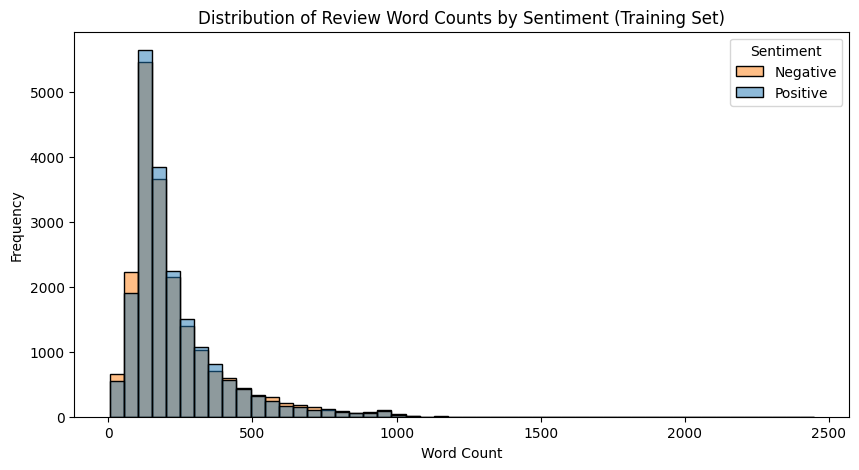

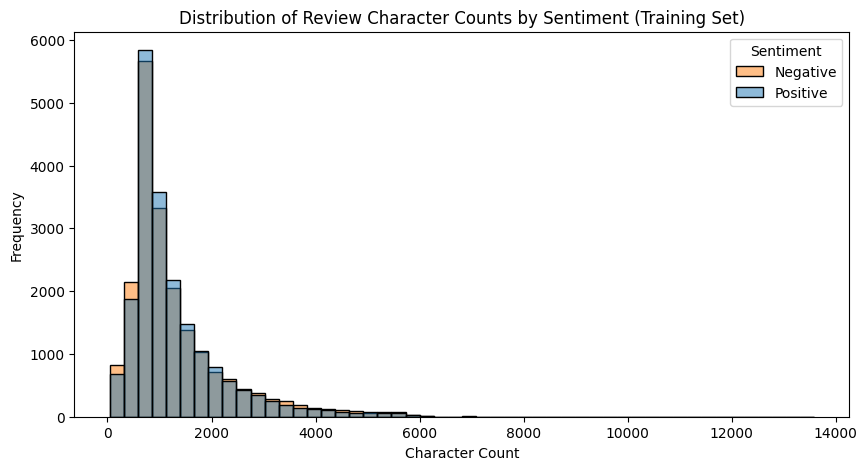

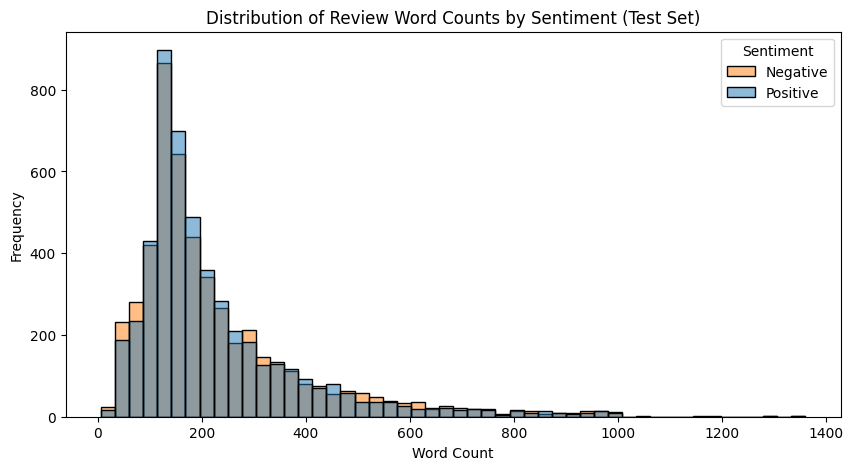

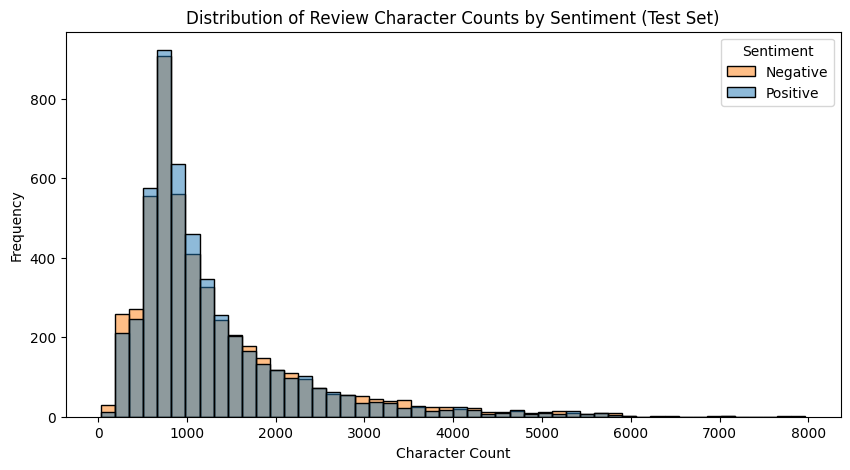

In [ ]:
# --- Split into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Combine X_train and y_train into a DataFrame
train_data = pd.DataFrame({
    "text": X_train,
    "label": y_train,
    "review_word_count": X_train.apply(lambda x: len(x.split())),
    "review_char_count": X_train.apply(len)
})

# --- Plot distribution for Training Set: Word count ---
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x="review_word_count", hue="label", bins=50)
plt.title("Distribution of Review Word Counts by Sentiment (Training Set)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

# --- Plot distribution for Training Set: Character count ---
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x="review_char_count", hue="label", bins=50)
plt.title("Distribution of Review Character Counts by Sentiment (Training Set)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

# Combine X_test and y_test into a DataFrame
test_data = pd.DataFrame({
    "text": X_test,
    "label": y_test,
    "review_word_count": X_test.apply(lambda x: len(x.split())),
    "review_char_count": X_test.apply(len)
})

# --- Plot distribution for Test Set: Word count ---
plt.figure(figsize=(10, 5))
sns.histplot(data=test_data, x="review_word_count", hue="label", bins=50)
plt.title("Distribution of Review Word Counts by Sentiment (Test Set)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

# --- Plot distribution for Test Set: Character count ---
plt.figure(figsize=(10, 5))
sns.histplot(data=test_data, x="review_char_count", hue="label", bins=50)
plt.title("Distribution of Review Character Counts by Sentiment (Test Set)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

In [ ]:
# --- Compare word count and character count distribution for positive and negative reviews in train and test sets ---

# --- Calculate and compare word count and character count distribution for positive and negative reviews in Training Set ---
train_positive_reviews = train_data[train_data['label'] == 1]
train_negative_reviews = train_data[train_data['label'] == 0]

# Training set word count statistics
print("Training Set - Positive Reviews - Word Count Statistics")
print(train_positive_reviews['review_word_count'].describe())
print("\nTraining Set - Negative Reviews - Word Count Statistics")
print(train_negative_reviews['review_word_count'].describe())

# Training set character count statistics
print("\nTraining Set - Positive Reviews - Character Count Statistics")
print(train_positive_reviews['review_char_count'].describe())
print("\nTraining Set - Negative Reviews - Character Count Statistics")
print(train_negative_reviews['review_char_count'].describe())

# --- Calculate and compare word count and character count distribution for positive and negative reviews in Test Set ---
test_positive_reviews = test_data[test_data['label'] == 1]
test_negative_reviews = test_data[test_data['label'] == 0]

# Test set word count statistics
print("\nTest Set - Positive Reviews - Word Count Statistics")
print(test_positive_reviews['review_word_count'].describe())
print("\nTest Set - Negative Reviews - Word Count Statistics")
print(test_negative_reviews['review_word_count'].describe())

# Test set character count statistics
print("\nTest Set - Positive Reviews - Character Count Statistics")
print(test_positive_reviews['review_char_count'].describe())
print("\nTest Set - Negative Reviews - Character Count Statistics")
print(test_negative_reviews['review_char_count'].describe())

Training Set - Positive Reviews - Word Count Statistics
count    20000.000000
mean       228.653400
std        175.112081
min         10.000000
25%        123.000000
50%        169.000000
75%        277.000000
max       2450.000000
Name: review_word_count, dtype: float64

Training Set - Negative Reviews - Word Count Statistics
count    20000.000000
mean       225.166450
std        161.324537
min          4.000000
25%        126.000000
50%        171.000000
75%        274.000000
max       1474.000000
Name: review_word_count, dtype: float64

Training Set - Positive Reviews - Character Count Statistics
count    20000.000000
mean      1299.964000
std       1017.096833
min         65.000000
25%        681.000000
50%        949.000000
75%       1578.000000
max      13584.000000
Name: review_char_count, dtype: float64

Training Set - Negative Reviews - Character Count Statistics
count    20000.000000
mean      1268.347550
std        923.920264
min         41.000000
25%        695.000000
50%  

**Week 3-4: Data Analysis & Visualization**

In [ ]:
# --- 3.1 NLP Method: Extracting Text Features ---

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- Using TF-IDF Feature Extraction ---
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- Building and Training a Logistic Regression Classification Model ---
clf = LogisticRegression(random_state=42)
clf.fit(X_train_tfidf, y_train)

# --- Predict the test set and evaluate model performance ---
y_pred = clf.predict(X_test_tfidf)

# --- Print model evaluation results ---
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8687

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5000
           1       0.86      0.88      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



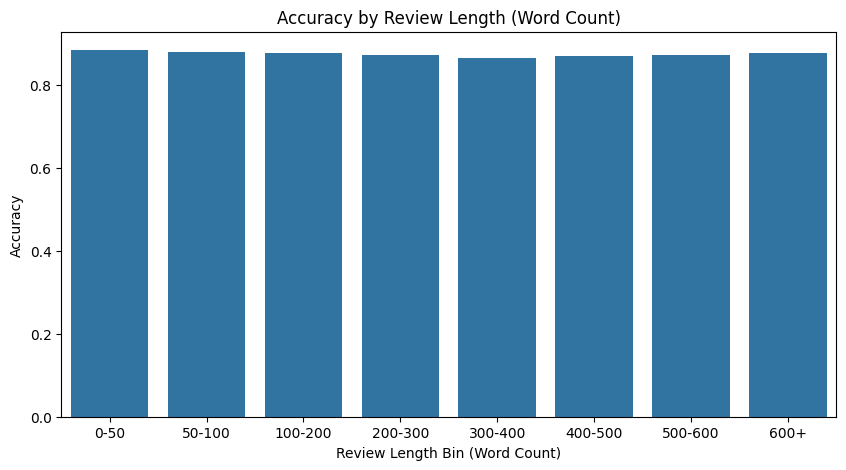

In [ ]:
# --- 3.2 Analyzing the Effect of Review Length on Sentiment Classification ---
# Here we analyze the performance of sentiment classification based on different review lengths

# --- Create bins for review lengths ---
length_bins = [0, 50, 100, 200, 300, 400, 500, 600, 10000]
length_labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600+']
df['length_bin'] = pd.cut(df['review_word_count'], bins=length_bins, labels=length_labels)

# --- Calculate accuracy for each length bin ---
accuracies = []
for length_bin in length_labels:
    subset = df[df['length_bin'] == length_bin]
    X_subset = vectorizer.transform(subset['text'])
    y_subset = subset['label']
    y_pred_subset = clf.predict(X_subset)
    accuracy = accuracy_score(y_subset, y_pred_subset)
    accuracies.append(accuracy)

# --- Visualization: Accuracy by Review Length Bin ---
plt.figure(figsize=(10, 5))
sns.barplot(x=length_labels, y=accuracies)
plt.title("Accuracy by Review Length (Word Count)")
plt.xlabel("Review Length Bin (Word Count)")
plt.ylabel("Accuracy")
plt.show()

**Considering both review text length and TF-IDF text features, with weights of 0.5 each**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

# --- TF-IDF Feature Extraction ---
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- Standardize review length to give it 0.5 weight (Scale it to match TF-IDF range) ---
# For simplicity, we scale the review length between 0 and 1, since TF-IDF values typically range from 0 to 1.
review_length_train = np.array([df["review_word_count"].iloc[X_train.index]]).T
review_length_test = np.array([df["review_word_count"].iloc[X_test.index]]).T

# Scale the review length to a 0-1 range (this is optional and can be modified based on specific needs)
review_length_train = (review_length_train - review_length_train.min()) / (review_length_train.max() - review_length_train.min())
review_length_test = (review_length_test - review_length_test.min()) / (review_length_test.max() - review_length_test.min())

# --- Combine TF-IDF features and scaled review length into one feature set ---
X_train_combined = np.hstack([X_train_tfidf.toarray(), review_length_train])
X_test_combined = np.hstack([X_test_tfidf.toarray(), review_length_test])

# --- Train Logistic Regression Model ---
clf = LogisticRegression(random_state=42)
clf.fit(X_train_combined, y_train)

# --- Make predictions on the test set and evaluate the model ---
y_pred = clf.predict(X_test_combined)

# --- Print model evaluation results ---
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8676

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5000
           1       0.85      0.89      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



<ipython-input-11-174bc04610d8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coef_df, palette='Blues_d')


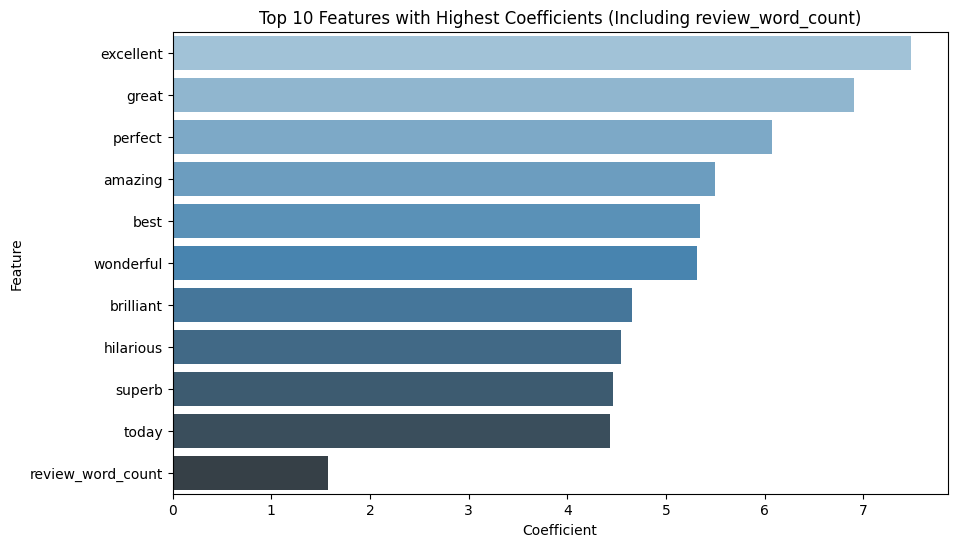

<ipython-input-11-174bc04610d8>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=bottom_coef_df, palette='Reds_d')


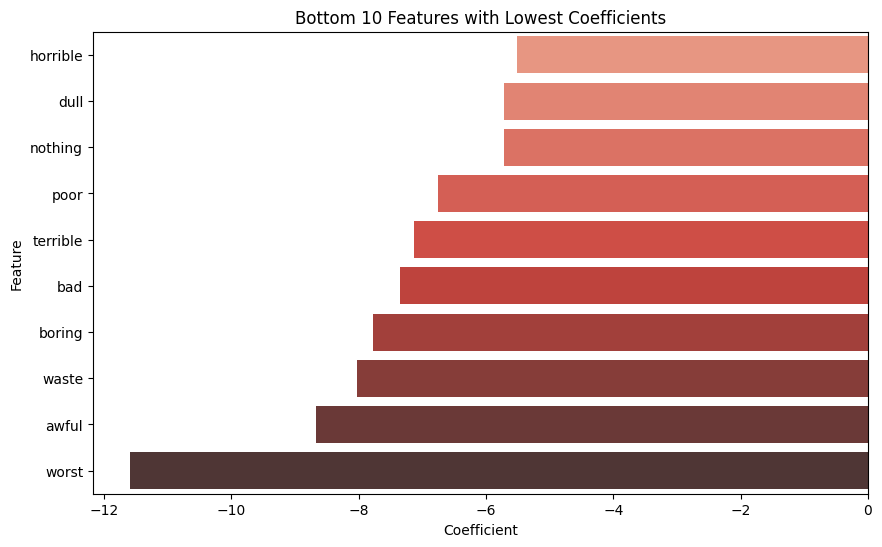

In [ ]:
# --- Visualization: Plotting the Model Coefficients ---
coef = clf.coef_[0]
# --- Visualize the weights of each feature ---
feature_names = np.concatenate([vectorizer.get_feature_names_out(), ['review_word_count']])
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# --- Ensure review_word_count is in the visualization ---
# Highlight the review_word_count in the top and bottom 10
top_coef_df = coef_df.head(10)
bottom_coef_df = coef_df.tail(10)

# Check if review_word_count is in top 10 and add it manually if necessary
if 'review_word_count' not in top_coef_df['Feature'].values:
    top_coef_df = pd.concat([top_coef_df, coef_df[coef_df['Feature'] == 'review_word_count']])

# --- Plotting: Top 10 Positive Coefficients ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_coef_df, palette='Blues_d')
plt.title("Top 10 Features with Highest Coefficients (Including review_word_count)")
plt.show()

# --- Plotting: Bottom 10 Negative Coefficients ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=bottom_coef_df, palette='Reds_d')
plt.title("Bottom 10 Features with Lowest Coefficients")
plt.show()

In [ ]:
import statsmodels.api as sm

# --- Add constant (intercept) for statsmodels ---
X_train_with_intercept = sm.add_constant(X_train_combined)
X_test_with_intercept = sm.add_constant(X_test_combined)

# --- Train Logistic Regression Model using statsmodels ---
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()

# --- Extract and display the coefficient and p-value for review_word_count (last feature) ---
# Assuming 'review_word_count' is the last feature, you can extract the coefficient and p-value for it:
review_word_count_index = X_train_with_intercept.shape[1] - 1  # Index of review_word_count feature
coef_review_word_count = result.params[review_word_count_index]
p_value_review_word_count = result.pvalues[review_word_count_index]

# Display the results for review_word_count
print(f"Coefficient for 'review_word_count': {coef_review_word_count}")
print(f"P-value for 'review_word_count': {p_value_review_word_count}")

# Check if the p-value is less than 0.05 (typically used significance threshold)
if p_value_review_word_count < 0.05:
    print("The 'review_word_count' feature is statistically significant.")
else:
    print("The 'review_word_count' feature is not statistically significant.")

Optimization terminated successfully.
         Current function value: 0.286078
         Iterations 8
Coefficient for 'review_word_count': 2.469776802047654
P-value for 'review_word_count': 2.567139368855736e-07
The 'review_word_count' feature is statistically significant.


<ipython-input-13-4d6f3f35e760>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_review_word_count = result.params[review_word_count_index]
<ipython-input-13-4d6f3f35e760>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_review_word_count = result.pvalues[review_word_count_index]


係數不一樣的原因，是因為使用了兩個不同的模型，視覺化的圖使用了sklearn.linear_model.LogisticRegression，自動標準化且自動加上intercept，而計算係數值及P-value使用statsmodels.api.Logit，是純統計方法且無標準化，直接給實際估出來的係數。但統計意義相同，係數為正且p-value極小，顯示影評長度對於評價有正向的顯著影響，可以推論影評長度與評價呈現正相關的關係。

在統計模型中，review_word_count 的係數為 2.47，這並不是指每增加一個字所對應的比重，而是反映了影評長度從最短到最長的範圍變化。由於我們對字數進行了 min-max 標準化（例如將從 10 字到 500 字的範圍轉換為 0 到 1 之間的數值），因此 review_word_count 係數 2.47 表示的是影評從最短到最長的字數變化範圍所帶來的影響。在其他條件不變的情況下，當 review_word_count 增加 1 單位（即從最短影評增加到最長影評），影評為正面的機率（odds）將會是 exp(2.47) ≈ 11.8，也就是說，影評越長，越有可能是正向情緒的評論。這個結果在統計上顯示非常顯著（p-value ≈ 0）。